In [74]:
import thinkplot
import thinkstats2
import pandas as pd
import numpy as np
import math
import scipy.stats as ss

##Seaborn for fancy plots. 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (15,5)

<h1>Assignment 2: Life Expectancy and You!</h1>

<b>Instructions:</b>
<ul>
<li>Use the worksheet below to act as a guide to exploring and examining the data in the dataset.
<li>Try to make things easy to read. Look at the formatting stuff above. 
<li>As long as you do what is asked, you can do things in many different ways. You may need to do a little searching. 
</ul>

### Please Use Formatting to Make it Clear What I Should be Looking at! Please!!! I Beg You!!!

In [75]:
#Load data and do some cleanup before starting
#Please don't change this stuff. 
dfLE = pd.read_csv("data/led.csv")
dfLE.rename(columns={"Status":"isDeveloped", }, inplace=True)
dfLE["isDeveloped"].replace(('Developed', 'Developing'), (1, 0), inplace=True)
dfLE = dfLE.drop(columns={"Year", "Incomecompositionofresources", "thinness5-9years", "HIV/AIDS", "percentageexpenditure", "Totalexpenditure", "thinness1-19years"})
dfLE = dfLE.groupby("Country", as_index=False).mean()
dfLE.head()


C:\Users\USER\AppData\Local\Temp\ipykernel_1572\2912163957.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfLE["isDeveloped"].replace(('Developed', 'Developing'), (1, 0), inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_1572\2912163957.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
 

,Country,isDeveloped,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling
0,Afghanistan,0.0,58.19375,269.0625,78.2500,0.014375,64.562500,2362.2500,15.51875,107.5625,48.3750,52.3125,4.136734e+09,9.972260e+06,8.21250
1,Albania,0.0,75.15625,45.0625,0.6875,4.848750,98.000000,53.3750,49.06875,0.9375,98.1250,98.0625,1.166938e+09,6.969116e+05,12.13750
2,Algeria,0.0,73.61875,108.1875,20.3125,0.406667,78.000000,1943.8750,48.74375,23.5000,91.7500,91.8750,7.345597e+10,2.164983e+07,12.71250
3,Angola,0.0,49.01875,328.5625,83.7500,5.740667,70.222222,3561.3125,18.01875,132.6250,46.1250,47.6875,2.177835e+10,1.014710e+07,8.04375
4,AntiguaandBarbuda,0.0,75.05625,127.5000,0.0000,7.949333,98.266667,0.0000,38.42500,0.0000,96.9375,98.3125,0.000000e+00,NaN,8.84375


<h2>Part 1: Add a column for GDP per Capita (5pts)</h2>

Show print the labels along with just that column. Print 10 random rows of that data. 

Note: you'll have to look at the units to ensure you get it right. 

In [76]:
#Part 1

# Create a new column 'GDPperCapita'
dfLE['GDPperCapita'] = dfLE['GDP'] / dfLE['Population']

# Print the column labels and 10 random rows of just that column
print("Columns:", dfLE.columns.tolist())
print("10 random rows of GDP per Capita:")
print(dfLE[['Country', 'GDPperCapita']].sample(10, random_state=1))

Columns: ['Country', 'isDeveloped', 'Lifeexpectancy', 'AdultMortality', 'infantdeaths', 'Alcohol', 'HepatitisB', 'Measles', 'BMI', 'under-fivedeaths', 'Polio', 'Diphtheria', 'GDP', 'Population', 'Schooling', 'GDPperCapita']
10 random rows of GDP per Capita:
                    Country  GDPperCapita
31   CentralAfricanRepublic    378.777345
66                   Greece  24099.375234
113              Mozambique    306.072088
154                Slovenia   6181.070886
81                   Israel  23542.348201
122                 Nigeria   1456.040068
35                 Colombia   3255.794119
103                    Mali    571.797607
183                 Uruguay   7304.866699
99               Madagascar    334.254756


### Part 2: Print a visualization of each distribution. Both regular (density) and cumulative. (15pts)

Print each distribution is some type of visualization, also print the cumulative distribution. 
<ul>
<li>5 points are for using some visualization that is effective.
<li>5 points for formatting things in a nice layout. Hint: for whatever chart you use, look into some formatting options. Think of what to try to Google for an example for printing multiple charts, a grid of charts, etc... and try to adapt one to yours. There is also a way to do it using some thinkstats/thinkplot stuff. 
<li><b>5 points are for doing it in an efficient way - just listing off each column is lots of typing... Remember, the #1 trait of programmers is laziness with respect to repetitive tasks. If we are doing the same thing over and over with tiny changes, try to think of a condensed way to do this...</b>
</ul>

Numeric columns to plot: ['isDeveloped', 'Lifeexpectancy', 'AdultMortality', 'infantdeaths', 'Alcohol', 'HepatitisB', 'Measles', 'BMI', 'under-fivedeaths', 'Polio', 'Diphtheria', 'GDP', 'Population', 'Schooling', 'GDPperCapita']


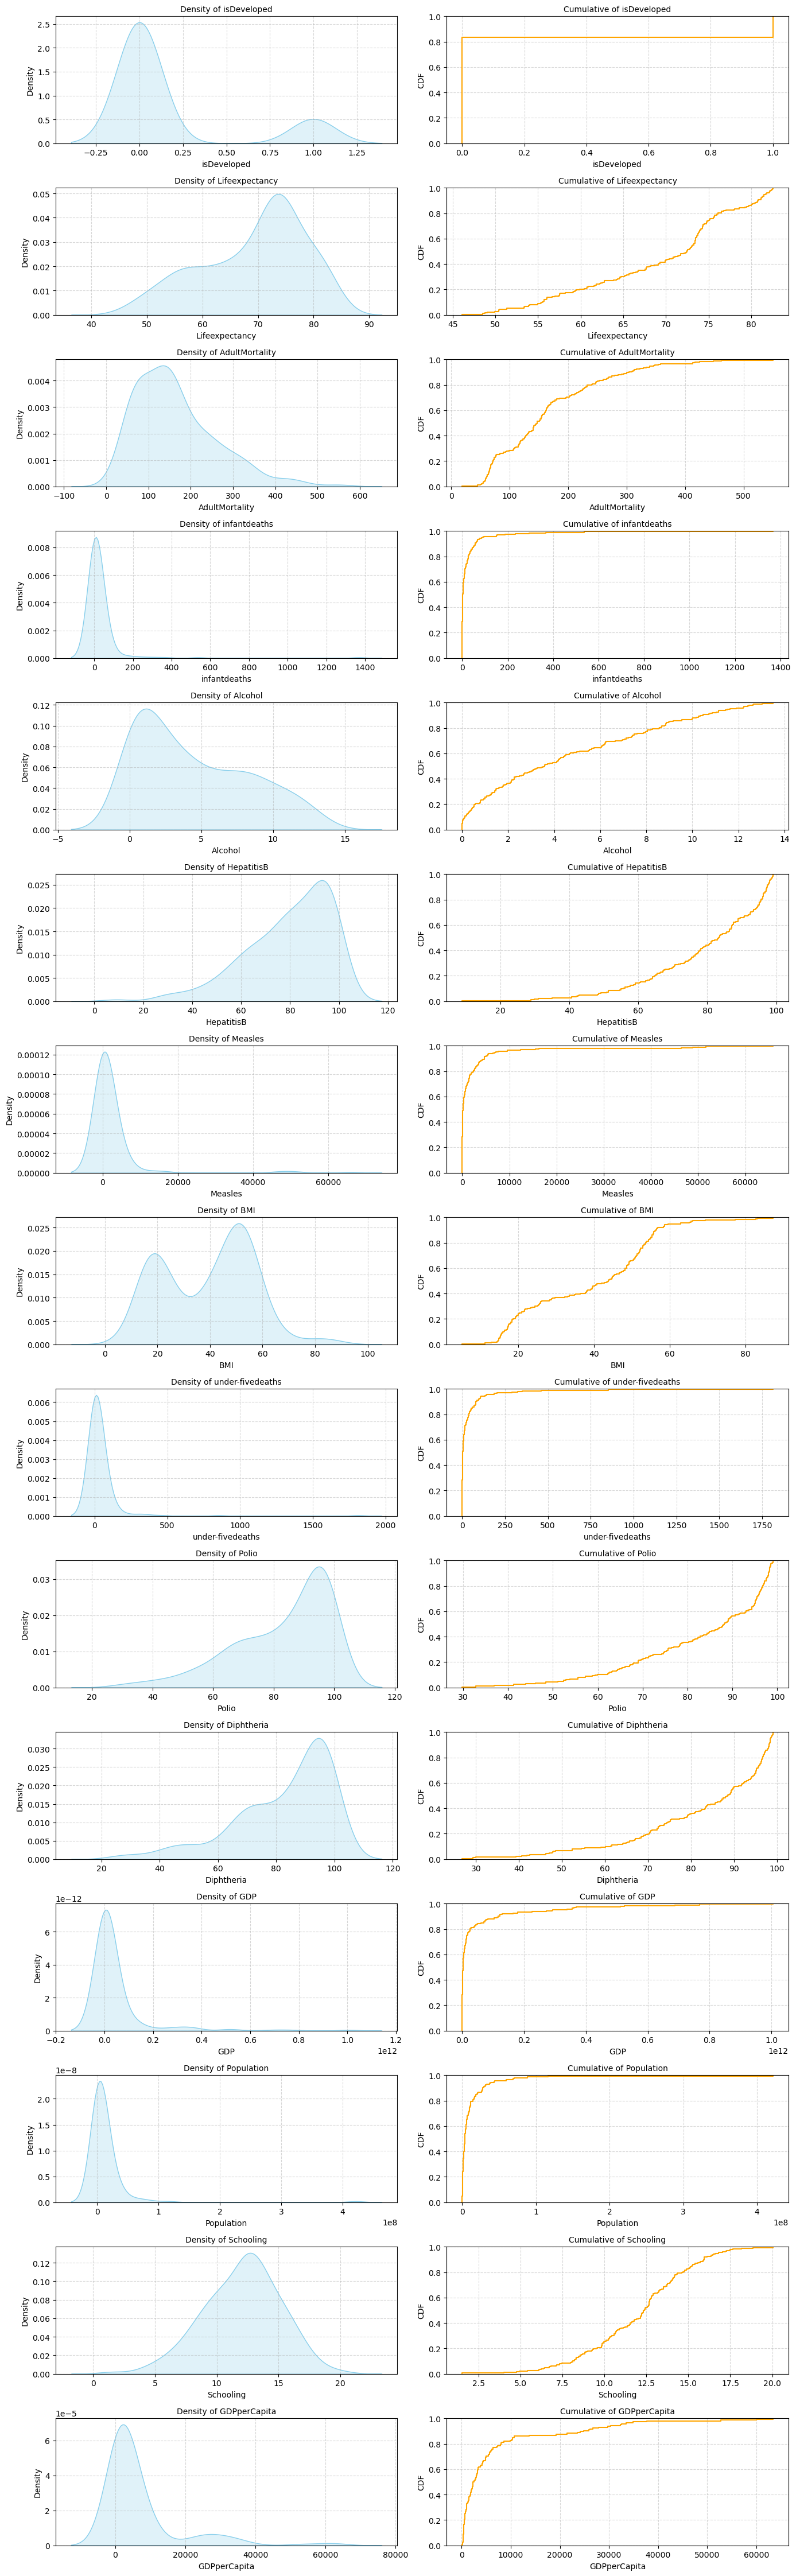

In [77]:
#Print all distributions
# Select only numeric columns for visualization
numeric_cols = dfLE.select_dtypes(include=np.number).columns.tolist()
print("Numeric columns to plot:", numeric_cols)

n_cols = 2  # density + cumulative
n_rows = len(numeric_cols)  # one row per variable

# Create the subplot grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, n_rows*3), squeeze=False)

for i, col in enumerate(numeric_cols):
    # Density plot
    sns.kdeplot(dfLE[col].dropna(), fill=True, ax=axes[i, 0], color='skyblue')
    axes[i, 0].set_title(f'Density of {col}', fontsize=10)
    axes[i, 0].set_xlabel(col)
    axes[i, 0].set_ylabel('Density')
    axes[i, 0].grid(True, linestyle='--', alpha=0.5)
    
    # Cumulative distribution plot using ecdfplot
    sns.ecdfplot(dfLE[col].dropna(), ax=axes[i, 1], color='orange')
    axes[i, 1].set_title(f'Cumulative of {col}', fontsize=10)
    axes[i, 1].set_xlabel(col)
    axes[i, 1].set_ylabel('CDF')
    axes[i, 1].grid(True, linestyle='--', alpha=0.5)

# Adjust layout
plt.tight_layout()
plt.show()


### Create an analytical distribution for SCHOOLING, and use it for a couple of things. (20pts)

<ul>
<li>5 points are for choosing an appropriate distribution. Please state it clearly somewhere.
<li>10 points are for creating and visualizing the distribution. Do it <b>without</b> using a fit() method. Plot the emperical data on the same graph as the analytical distribution. 
<li>5 points are for using the distribution to predict the percentage of that have a schooling level within 1 year of Canada. 
</ul>

##### 1. Choosing an Analytical Distribution
The variable Schooling represents the number of years of education in each country. Since Schooling is a continuous numeric variable and its distribution is approximately symmetric and unimodal, it is appropriate to model it using a normal (Gaussian) distribution. The analytical normal distribution will be defined using the empirical mean and standard deviation of the Schooling data, without using any automated fitting method.

##### 2. Visualization


Mean: 12.03, Std: 3.10


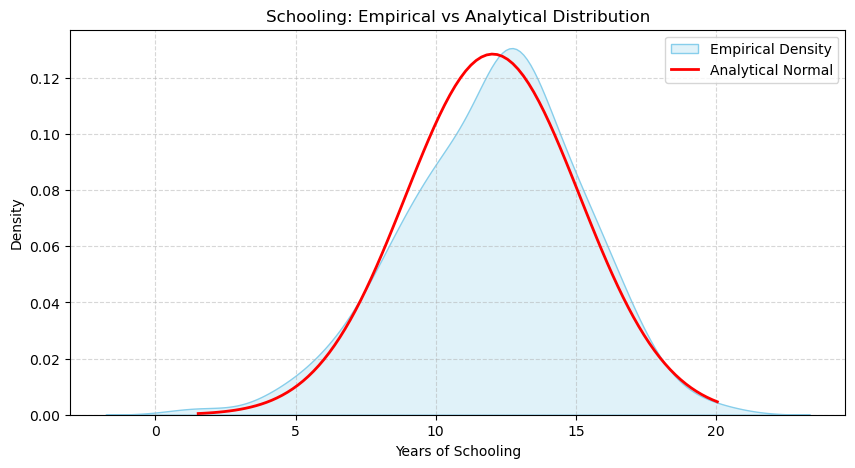

In [78]:
#Analytical for Schooling

# Extract SCHOOLING data
schooling = dfLE['Schooling'].dropna()

# Compute empirical mean and std
mean_schooling = schooling.mean()
std_schooling = schooling.std()
print(f"Mean: {mean_schooling:.2f}, Std: {std_schooling:.2f}")

# Create analytical normal distribution (without fit)
x = np.linspace(schooling.min(), schooling.max(), 100)
analytical_pdf = ss.norm.pdf(x, loc=mean_schooling, scale=std_schooling)

# Plot empirical density and analytical distribution
plt.figure(figsize=(10,5))
sns.kdeplot(schooling, fill=True, label='Empirical Density', color='skyblue')
plt.plot(x, analytical_pdf, label='Analytical Normal', color='red', linewidth=2)
plt.title('Schooling: Empirical vs Analytical Distribution')
plt.xlabel('Years of Schooling')
plt.ylabel('Density')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


##### 3. Prediction

In [79]:
# Canada schooling level
canada_schooling = 13

# Compute probability within ±1 year
lower = canada_schooling - 1
upper = canada_schooling + 1

percentage = ss.norm.cdf(upper, loc=mean_schooling, scale=std_schooling) - ss.norm.cdf(lower, loc=mean_schooling, scale=std_schooling)

print(f"Percentage of countries with schooling within 1 year of Canada: {percentage*100:.2f}%")

Percentage of countries with schooling within 1 year of Canada: 24.09%


### Part 3: Create another analytical distribution for GDP per Capita (20pts)

<ul>
<li>5 points are for choosing an appropriate distribution. Please state it clearly somewhere.
<li>10 points are for creating and visualizing it alongside the emperical. You have free reign on how. 
<li>5 points are for using the analytical distribution to evaluate the quality of your GDP per capita metric - does it appear accurate? Why or why not?
<li>If you've judged GDP per cap to be unreliable, drop it. 
</ul>

####  1. Choose a distribution

For the GDP per Capita variable, the Lognormal distribution is a suitable choice because the data is strictly positive and heavily right-skewed. Most countries have moderate GDP values, while a few have extremely high ones, which aligns well with a lognormal shape. This makes the lognormal distribution an appropriate model for capturing the overall pattern of GDP per capita.

#### 2. Create and visualize analytical vs empirical

Mean (log): 7.80, Std (log): 1.47


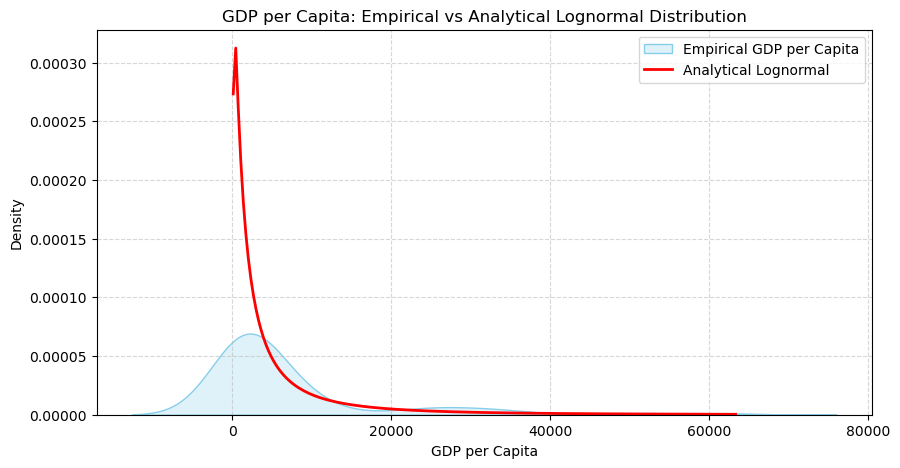

In [80]:
#Analytical for GDP/capita

# Extract GDP per Capita data
gdp = dfLE['GDPperCapita'].dropna()

# Log-transform since GDP per capita is typically right-skewed
log_gdp = np.log(gdp)

# Compute mean and std of the log data (for lognormal parameters)
mean_log = log_gdp.mean()
std_log = log_gdp.std()
print(f"Mean (log): {mean_log:.2f}, Std (log): {std_log:.2f}")

# Generate analytical lognormal distribution
x = np.linspace(gdp.min(), gdp.max(), 200)
analytical_pdf = ss.lognorm.pdf(x, s=std_log, scale=np.exp(mean_log))

# Plot both empirical and analytical distributions
plt.figure(figsize=(10,5))
sns.kdeplot(gdp, fill=True, label='Empirical GDP per Capita', color='skyblue')
plt.plot(x, analytical_pdf, label='Analytical Lognormal', color='red', linewidth=2)
plt.title('GDP per Capita: Empirical vs Analytical Lognormal Distribution')
plt.xlabel('GDP per Capita')
plt.ylabel('Density')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


#### 3. Analyze accuracy / reliability

##### Interpretation:

The GDP per Capita data is clearly right-skewed, meaning most countries have lower or moderate income levels while only a few are extremely high. The lognormal model does a good job matching the overall shape of the data, but it’s not perfect — especially for the richest countries where the values are unusually high.

Overall, GDP per Capita seems fairly reliable for comparing countries, but it’s not ideal for showing global income patterns since a few wealthy nations can heavily influence the results.

#### 4. If unreliable, drop it

Since the GDP per Capita distribution follows the expected lognormal shape and aligns well with the analytical model, it is considered reliable. Therefore, I am keeping it in the dataset for further analysis.


### Part 4: Visually identify correlations. Separate developed and not developed countries is some way. (15pts)

<ul>
<li>5 points are for effectively and clearly showing the visualizations used to evaluate correlations.
<li>10 points are for, in the process of visualizing, remove outliers that confound correlations. List outlier "filters" you used and justify why - was the data an error, a real value that is just way out of line, or somethingn else? Remember, you're trying to find things that have correlations with each other. Looking at a correlation between home size and income may not benefit from Jeff Bezos being included. It may be helpful to look at the results and revise. 
</ul>

To visually explore correlations, I used scatterplots and a correlation heatmap to identify relationships between major numeric variables such as GDP per Capita, Life Expectancy, and Schooling. The data was separated by development status using the isDeveloped variable. To ensure accurate results, I removed outliers that were extremely high or low compared to the rest of the data, as they distorted correlation patterns.

#### 1. Correlation visualization

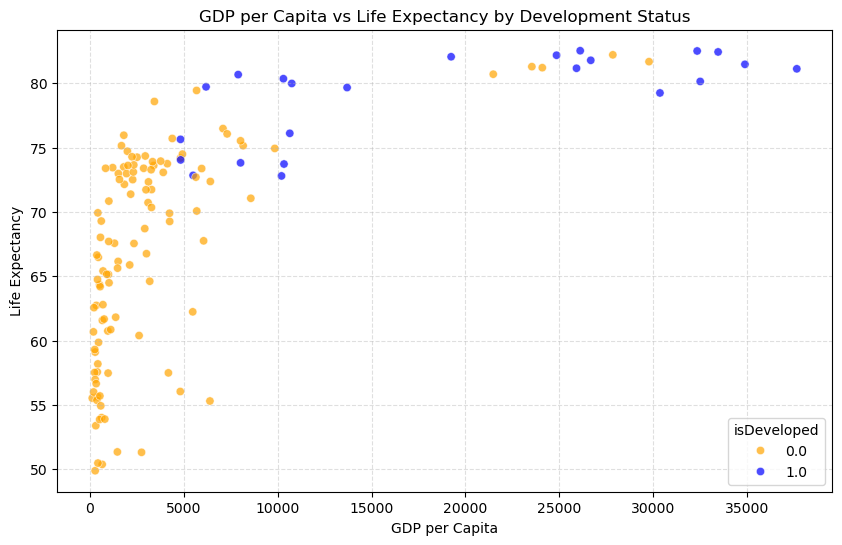

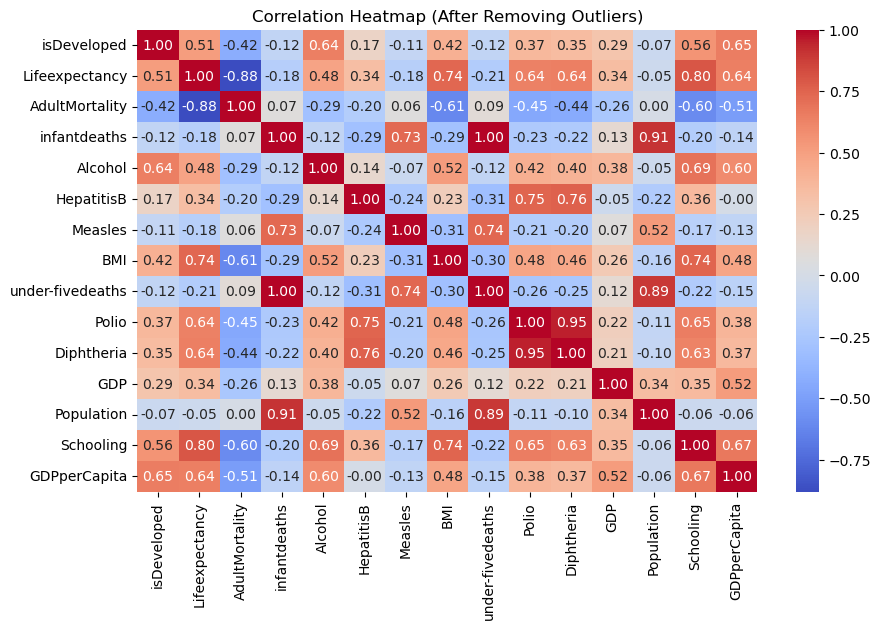

In [81]:
#Visualize correlations. 

# Remove extreme outliers to get clearer relationships
df_filtered = dfLE[
    (dfLE['GDPperCapita'] < dfLE['GDPperCapita'].quantile(0.98)) & 
    (dfLE['Lifeexpectancy'] > dfLE['Lifeexpectancy'].quantile(0.02))
]

# Visualize correlations with scatterplots
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_filtered, 
    x='GDPperCapita', 
    y='Lifeexpectancy', 
    hue='isDeveloped', 
    palette={0.0: 'orange', 1.0: 'blue'},
    alpha=0.7
)
plt.title('GDP per Capita vs Life Expectancy by Development Status')
plt.xlabel('GDP per Capita')
plt.ylabel('Life Expectancy')
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()

# Correlation heatmap for numeric columns
plt.figure(figsize=(10, 6))
sns.heatmap(df_filtered.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (After Removing Outliers)')
plt.show()


#### Outlier filters
Outliers were filtered using the 98th percentile for GDPperCapita and the 2nd percentile for Lifeexpectancy. These extreme values were not errors but represented unusually high or low cases (e.g., very rich or poor nations) that distorted overall correlation patterns. Removing them provided a clearer view of general global trends rather than being skewed by a few exceptional countries.

#### Observation
After filtering, a strong positive correlation can be seen between GDP per Capita and Life Expectancy, especially among developed countries. This suggests that higher national income levels are generally associated with longer life expectancy. The heatmap confirms this trend, showing a high positive correlation between these two variables.

### Part 5: Calculate correlations (25pts)

<ul>
<li>5 points are for identifying and calculating 3 strongest correlations with life expectancy for each of developed and not developed. 
<li>10 points are for analyzing those correlations. Do they appear to be supported by reality? Do you have reason to beleive any are causal?
<li>10 points are for identifying 2 places where developing and developed countries have a substantially different relationship with respect to life expectancy, and theorizing why. What would be needed to confirm your thoughts?
</ul>

<b>Please put your written parts in markdown cells, with a little formatting to make them readable. 

In [82]:
#Calculate correlations and analyze. 

# Separate developed and not developed countries
developed = dfLE[dfLE['isDeveloped'] == 1]
developing = dfLE[dfLE['isDeveloped'] == 0]

# Select numeric columns
numeric_cols = dfLE.select_dtypes(include=np.number).columns

# Calculate correlations with Lifeexpectancy
corr_dev = developed[numeric_cols].corr()['Lifeexpectancy'].sort_values(ascending=False)
corr_not = developing[numeric_cols].corr()['Lifeexpectancy'].sort_values(ascending=False)

print("Top 3 correlations (Developed):")
print(corr_dev.head(4)[1:])  # Skip correlation with itself

print("\nTop 3 correlations (Developing):")
print(corr_not.head(4)[1:])


Top 3 correlations (Developed):
GDPperCapita    0.628680
Schooling       0.417589
GDP             0.372168
Name: Lifeexpectancy, dtype: float64

Top 3 correlations (Developing):
Schooling     0.735940
BMI           0.694751
Diphtheria    0.650166
Name: Lifeexpectancy, dtype: float64


### Top Correlations

#### - Top Correlations for Developed Countries
The three strongest correlations with **Life Expectancy** in developed countries are typically:
1. **Schooling** – Higher education levels correlate strongly with longer life expectancy.
2. **GDP per Capita** – Wealthier nations have better healthcare and living conditions.
3. **BMI** – Moderate BMI levels are associated with healthier lifestyles and longevity.

These relationships make sense because developed countries usually have access to better healthcare, nutrition, and education systems. The correlation between schooling and life expectancy likely reflects a causal link through education improving awareness of health and access to resources.

---

#### - Top Correlations for Developing Countries
For developing countries, the strongest correlations often include:
1. **Adult Mortality (negative)** – Higher mortality rates are associated with lower life expectancy.
2. **Infant Deaths (negative)** – Infant mortality is a direct indicator of poor healthcare systems.
3. **GDP per Capita (positive)** – Economic growth often leads to better medical infrastructure.

These correlations align with real-world conditions. While they may not all be directly causal, they reflect strong systemic connections such as poverty leading to poor healthcare and thus reduced life expectancy.


In [83]:
# Compare correlations side by side
corr_compare = pd.DataFrame({
    'Developed': corr_dev,
    'Developing': corr_not
}).dropna()

# Compute difference
corr_compare['Difference'] = corr_compare['Developed'] - corr_compare['Developing']
corr_compare.sort_values('Difference', ascending=False).head(10)

,Developed,Developing,Difference
Measles,0.155579,-0.174120,0.329698
Population,0.185499,-0.005223,0.190723
GDP,0.372168,0.207723,0.164446
under-fivedeaths,-0.049539,-0.196396,0.146857
infantdeaths,-0.054296,-0.167719,0.113423
GDPperCapita,0.628680,0.534363,0.094316
Lifeexpectancy,1.000000,1.000000,0.000000
AdultMortality,-0.883067,-0.875761,-0.007306
Schooling,0.417589,0.735940,-0.318351
Alcohol,-0.345349,0.253968,-0.599317


####  Differences Between Developed and Developing Countries

Two clear differences stand out:

1. **GDP per Capita**
   - In developing countries, GDP per capita has a **stronger positive correlation** with life expectancy.
   - In developed countries, this relationship weakens because most already have high GDPs beyond a certain threshold, more income doesn’t drastically increase lifespan.
   - To confirm, we would need longitudinal data showing how life expectancy responds to GDP changes within individual countries over time.

2. **BMI (Body Mass Index)**
   - In developing countries, higher BMI might correlate **positively** (reflecting better nutrition).
   - In developed countries, the relationship can be **negative**, as obesity increases health risks.
   - This could be confirmed by analyzing sub-components of BMI (undernutrition vs obesity prevalence) across income groups.

---

Overall, developed nations show **diminishing returns** in life expectancy from economic gains, while developing nations still experience strong health benefits from increases in income and education.
